## DAT_12_SF Midterm
____________________--

### About the data
For this midterm, you'll be working with a dataset related to classifying emails as spam. The dataset was built by researchers at the UCI Machine Learning Institute

Data Set Information:

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... 



Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 

###Definitions of the attributes: 
_______________-

####48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

####6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

####1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_total 
= sum of length of uninterrupted sequences of capital letters 
= total number of capital letters in the e-mail 

####1 nominal {0,1} class attribute of type spam 
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

import os

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

os.system("taskset -p 0xff %d" % os.getpid()) # multi-core support

32512

In [4]:
# Load the spambase.csv as a pandas DataFrame (last column of data contains Target Data - is_spam)
spam_data = pd.read_csv("spambase.csv")
# spam_data.head()
# spam_data.describe()
# spam_data.info()

###Exercise 1: Explore the dataset and display some visualizations showing how the variables relate to each other


In [42]:
# spam_data.head(300).hist(figsize=(26,26)) # so slow!!
# spam_data.head(300).pivot(index=spam_data.head(300).index, columns='is_spam') # not quite...
spam_data.groupby('is_spam').sum() # now we're talking..

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
is_spam,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,204.86,681.57,559.22,2.47,504.74,124.19,26.16,107.10,106.08,466.07,60.53,1495.27,171.92,118.22,23.19,205.16,134.79,271.25,3541.71,21.13,1223.10,126.09,19.76,47.78,2496.58,1204.40,3527.56,540.33,453.87,462.40,295.62,215.53,420.95,216.87,472.44,394.98,551.31,52.20,339.24,231.73,200.81,604.46,196.78,353.06,1159.14,800.67,22.84,142.82,140.183,442.116,63.242,306.634,32.476,60.536,6627.915,50782,450181
1,276.19,298.51,732.08,298.55,931.80,317.05,499.31,377.36,308.32,635.47,214.72,997.10,260.25,151.52,203.20,939.79,521.25,578.76,4105.61,372.61,2502.61,431.56,447.91,385.95,31.69,16.63,2.81,34.08,1.24,10.82,2.31,0.94,26.40,3.22,12.56,53.51,78.81,8.54,22.53,66.57,0.10,4.43,15.32,11.32,226.79,26.70,2.21,3.81,37.299,197.563,14.864,931.361,316.329,143.004,17258.246,189265,853233


In [89]:
spam_data.describe().T

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601,0.104553,0.305358,0,0.000,0.000,0.000,4.540
word_freq_address,4601,0.213015,1.290575,0,0.000,0.000,0.000,14.280
word_freq_all,4601,0.280656,0.504143,0,0.000,0.000,0.420,5.100
word_freq_3d,4601,0.065425,1.395151,0,0.000,0.000,0.000,42.810
word_freq_our,4601,0.312223,0.672513,0,0.000,0.000,0.380,10.000
word_freq_over,4601,0.095901,0.273824,0,0.000,0.000,0.000,5.880
word_freq_remove,4601,0.114208,0.391441,0,0.000,0.000,0.000,7.270
word_freq_internet,4601,0.105295,0.401071,0,0.000,0.000,0.000,11.110
word_freq_order,4601,0.090067,0.278616,0,0.000,0.000,0.000,5.260
word_freq_mail,4601,0.239413,0.644755,0,0.000,0.000,0.160,18.180


In [143]:
# spam_data.groupby('is_spam').sum().plot(figsize=(26,26), kind='bar') # now we're talking..
remove    =   ['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'is_spam']
spam_only =   spam_data[spam_data['is_spam'] == 1].sum().drop(remove)
ham_only  =   spam_data[spam_data['is_spam'] == 0].sum().drop(remove)

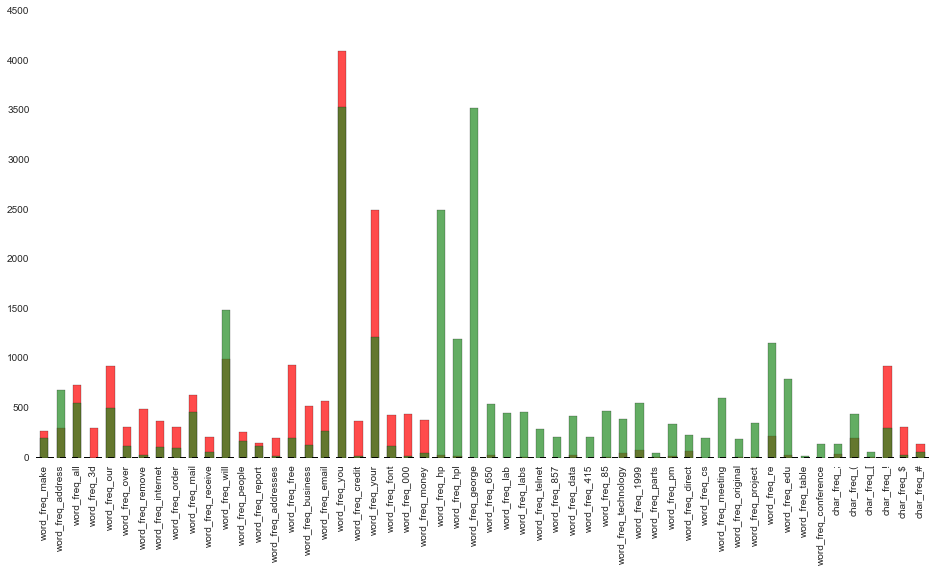

In [144]:
# George = you ham you, you = lots of spam and ham.. Generally, terms 1-23 are more spam-like than the rest
spam_only.plot(kind='bar', color='Red', figsize=(16,8), alpha=.7)
ham_only.plot(kind="bar", color='ForestGreen', figsize=(16,8), alpha=.7)

###Exercise 2: Build a simple logistic regression and visualize it

use the variable "capital_run_length_longest" to predict "is_spam"
How accurate is this single feature?

In [503]:
#your code here
import statsmodels.formula.api as smf
from sklearn import linear_model

# train_data = spam_data.drop(['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total'], axis=1)
# logit = smf.Logit(spam_data['capital_run_length_longest'], spam_data['is_spam'])

X = spam_data[['capital_run_length_longest']]
Y = spam_data['is_spam']

logreg = linear_model.LogisticRegression(C=1.0)
result = logreg.fit(X, Y)

# print "Score: %f" % result.score(X, Y)

# examine the coefficients
# pd.DataFrame(zip(X.columns, np.transpose(result.coef_))) # will reuse later

# This looks nicer
print 'Coefficients: \n', logreg.coef_

# The mean square error
print ("Residual sum of squares: %.2f" %
        np.mean((logreg.predict(X) - Y) ** 2))

# Explained variance score: 1 is perfect prediction
print ('Variance score: %.2f' % logreg.score(X, Y))

Coefficients: 
[[ 0.02514014]]
Residual sum of squares: 0.27
Variance score: 0.73


In [80]:
# basic plot of spams (y) to range of "longest" var (X)

# def plot_decision_boundary(clf, X):  # save for later...
#     w = clf.coef_.ravel()
#     a = -w[0] / w[1]
#     xx = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
#     yy = a * xx - clf.intercept_ / w[1]
#     plt.plot(xx, yy)
#     plt.xticks(())
#     plt.yticks(())

y_hat = logreg.predict(X)
plt.scatter( X.values[:, 0], 
             Y.values, 
             c=y_hat)
# plot_decision_boundary(logreg, X.values)


ValueError: X has 3 features per sample; expecting 58

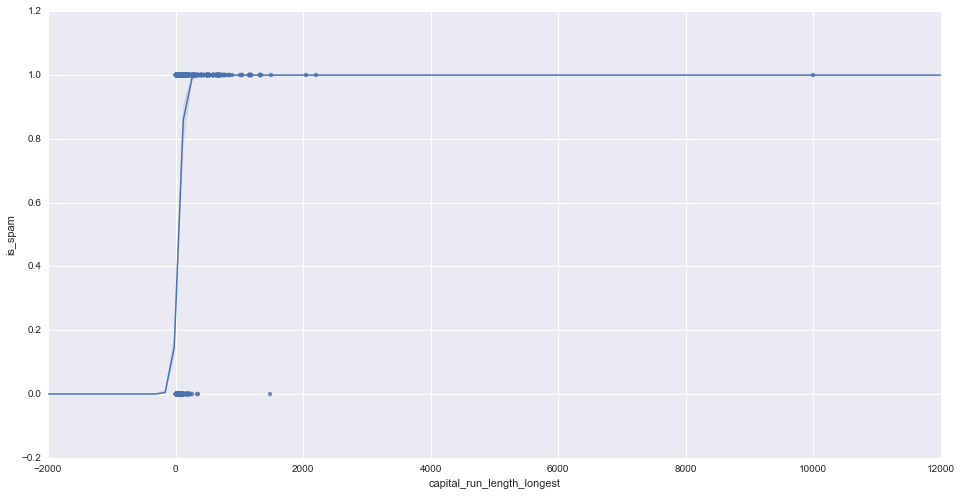

In [263]:
# Plot outputs - seaborn has regression built-in?  Awesome no? 
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1})

# Styles are kinda messed up again tried to manually set.. defaults unphased.  Leaving here for later reference.
"""
{'axes.axisbelow': True,
 'axes.edgecolor': '.8',
 'axes.facecolor': 'grey',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1,
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0,
 'xtick.minor.size': 0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0,
 'ytick.minor.size': 0}
"""

# sns.set_style("darkgrid", {"grid.linewidth": .5, "axes.facecolor": ".9"})
# sns.set_context(rc={"figure.figsize": (16, 8)})
# sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

sns.set_context(rc={"figure.figsize": (16, 8)})
# seems like this is the only way to get a good looking plot now :(
with sns.axes_style("darkgrid"):

    sns.regplot('capital_run_length_longest', 'is_spam', data=spam_data, logistic=True)

# plt.scatter(X, Y, figsize=(16,8), color='black')
# plt.plot(X, logreg.predict(X), color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# pl.show()

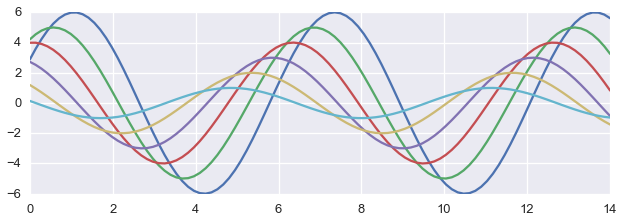

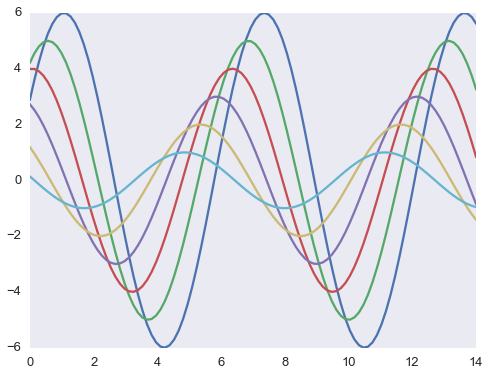

### Exercise 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables
use random state = 12 so that we can compare results

In [71]:
from sklearn.cross_validation import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(spam_data, spam_data.is_spam, test_size=0.3, random_state=12)

In [72]:
logreg = linear_model.LogisticRegression(C=1.0)
result = logreg.fit(X_train, y_train)

print 'Coefficients: \n', logreg.coef_

# The mean square error - wtf?
print ("Residual sum of squares: %.10f" %
        np.mean((logreg.predict(X_test) - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print ('Variance score: %.2f' % logreg.score(X_test, y_test))

Coefficients: 
[[ -1.28101642e-01  -1.42517813e-01  -2.35279269e-02   1.65581902e-01
    2.53997359e-01   1.97820326e-01   5.28084360e-01   1.17748957e-01
    5.08576262e-02   9.88295440e-02   1.06663428e-01  -2.08689826e-01
   -3.96582192e-02   3.86732444e-02   2.23935407e-01   2.48043618e-01
    2.69967477e-01   4.15757538e-02  -6.27269396e-02   2.89158223e-01
    1.22814810e-01   7.80836509e-02   6.81531004e-01   1.29346864e-01
   -7.12357104e-01  -5.07528319e-01  -9.38032339e-01  -9.10726524e-03
   -3.85929339e-01  -2.52735256e-01  -1.56415001e-01  -5.61616723e-02
   -4.70562379e-01  -6.22947842e-02  -2.90012916e-01  -5.15096551e-02
   -2.16640954e-01  -1.57948536e-01  -2.86937699e-01  -4.72267559e-02
   -2.69715175e-01  -6.29313869e-01  -2.14611149e-01  -4.87698196e-01
   -4.26586793e-01  -7.03749603e-01  -1.22625255e-01  -3.15240473e-01
   -3.85004432e-01  -3.38057430e-01  -1.69937709e-01   1.02286233e-01
    6.41497624e-01   1.86090067e-01  -5.46877991e-03   2.67590622e-03
    1

0.380883417813
0.380883417813
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 59 columns):
word_freq_make                0 non-null float64
word_freq_address             0 non-null float64
word_freq_all                 0 non-null float64
word_freq_3d                  0 non-null float64
word_freq_our                 0 non-null float64
word_freq_over                0 non-null float64
word_freq_remove              0 non-null float64
word_freq_internet            0 non-null float64
word_freq_order               0 non-null float64
word_freq_mail                0 non-null float64
word_freq_receive             0 non-null float64
word_freq_will                0 non-null float64
word_freq_people              0 non-null float64
word_freq_report              0 non-null float64
word_freq_addresses           0 non-null float64
word_freq_free                0 non-null float64
word_freq_business            0 non-null float64
word_freq_email               0 non-null flo

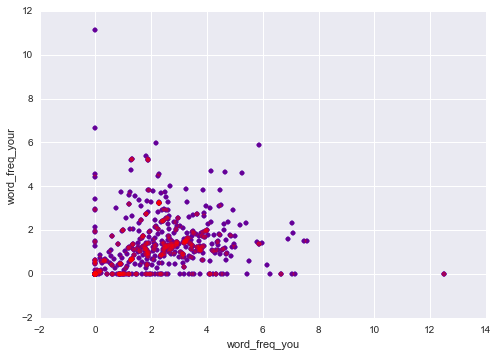

In [151]:
X_test_df = pd.DataFrame(X_test, columns=spam_data.columns)
X_test_df['predicted_spam'] = logreg.predict(X_test)

ax2 = X_test_df[X_test_df['is_spam'] == 1].plot(x='word_freq_you', y='word_freq_your', kind='scatter', color="blue", alpha=1)
X_test_df[X_test_df['predicted_spam'] == 1].plot(x='word_freq_you', y='word_freq_your', kind='scatter', color="red", alpha=.4, ax=ax2)

print X_test_df['predicted_spam'].mean()
print X_test_df['is_spam'].mean()

print X_test_df[X_test_df['predicted_spam'] != X_test_df['is_spam']].info() # legit?

In [ ]:
# not quite as good...

sns.set_context(rc={"figure.figsize": (16, 8)})
# seems like this is the only way to get a good looking plot now :(

# x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
# y_min, y_max = y_test[:, 0].min() - .5, X_test[:, 1].max() + .5
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

print X_test.shape, np.array(y_hat).T.shape

test_df = pd.DataFrame(X_test, columns=spam_data.columns)
# test_df['pred_spam']

all_columns = " + ".join(test_df.columns)

with sns.axes_style("darkgrid"):

    sns.regplot(x='word_freq_free', y='is_spam', data=test_df,  logistic=True)


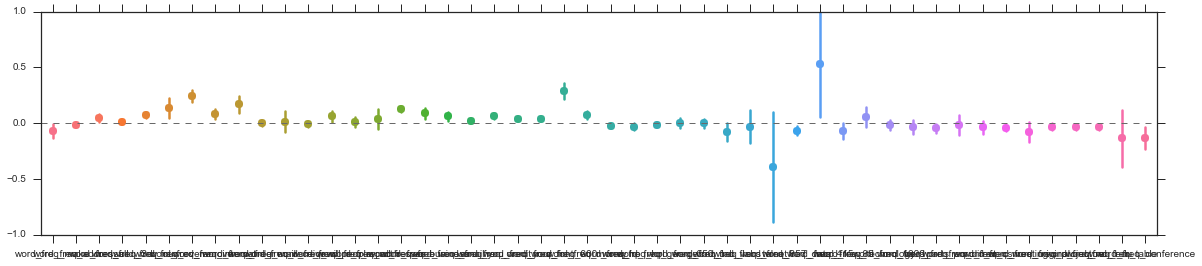

In [333]:
sns.coefplot("is_spam ~ word_freq_make + word_freq_address + word_freq_all + word_freq_3d + word_freq_our + word_freq_over + word_freq_remove + word_freq_internet + word_freq_order + word_freq_mail + word_freq_receive + word_freq_will + word_freq_people + word_freq_report + word_freq_addresses + word_freq_free + word_freq_business + word_freq_email + word_freq_you + word_freq_credit + word_freq_your + word_freq_font + word_freq_000 + word_freq_money + word_freq_hp + word_freq_hpl + word_freq_george + word_freq_650 + word_freq_lab + word_freq_labs + word_freq_telnet + word_freq_857 + word_freq_data + word_freq_415 + word_freq_85 + word_freq_technology + word_freq_1999 + word_freq_parts + word_freq_pm + word_freq_direct + word_freq_cs + word_freq_meeting + word_freq_original + word_freq_project + word_freq_re + word_freq_edu + word_freq_table + word_freq_conference", test_df)

###Exercise 4: Apply Crossvalidation to see how the model fares across different splits of your date

#### Use crossvalidation to score model

In [ ]:
#your code here

### Exercise 5: Compare Performance of Logistic Regression to KNN with 3 neighbors
-Which model is more accurate?

In [337]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score

In [338]:
# Various variables we'll need to set intially.
n_neighbors = range(1, 51, 2)

In [339]:
X_train, X_test, y_train, y_test = train_test_split(spam_data, spam_data.is_spam, test_size=0.3, random_state=12)

In [340]:
scores = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

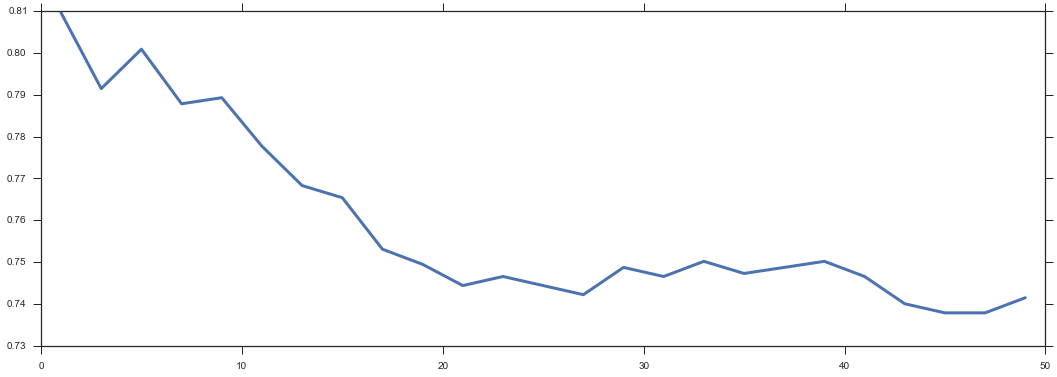

In [341]:
# I know we only want n=3 but just curious

plt.figure(figsize=(18,6))
_ = plt.plot(n_neighbors, scores, linewidth=3.0)

In [424]:
from sklearn.cross_validation import cross_val_score
clf = neighbors.KNeighborsClassifier(3, weights='uniform')
scores = cross_val_score(clf, spam_data.values, spam_data.is_spam, cv=5)

print "Scores: %s \nMean: %f" % (scores, np.mean(scores))

Scores: [ 0.77850163  0.80021716  0.83279045  0.81828074  0.70946681] 
Mean: 0.787851


### Exercise 6: Evaluate Feature Importance
Which features are the most influential in this model?

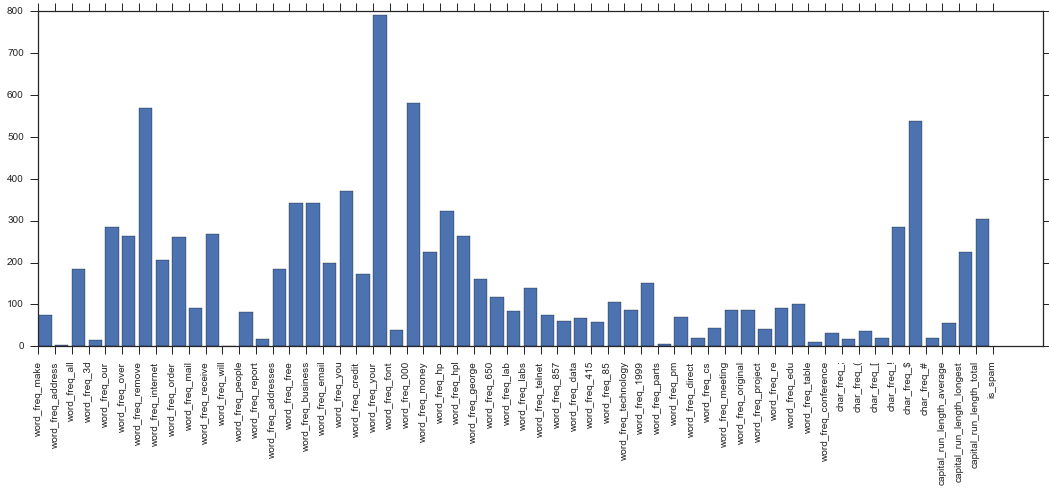

In [430]:
# it would be nice to see these feature labels no?  I think features "word_freq_remove", #21, and -5 from the end.. hmm
n = np.arange(len(spam_data.columns))

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)

ax.bar(n, feature_selection.f_classif(spam_data.values, spam_data.is_spam)[0])
ax.set_xticks(n) 
xtickNames = ax.set_xticklabels(spam_data.columns)

_ = plt.setp(xtickNames, rotation=90, fontsize=10)


In [591]:
# test with two features, 3 neighbors
features = ['word_freq_your', 'char_freq_$']

# looked up the offsets in the table..
clf = neighbors.KNeighborsClassifier(3, weights='uniform')
clf.fit(spam_data[features].values, spam_data.is_spam)

scores = cross_val_score(clf, spam_data.values, spam_data.is_spam, cv=5)

# The mean square error
print ("Residual sum of squares: %.2f" %
        np.mean((clf.predict(spam_data[features]) - spam_data.is_spam) ** 2))

# Explained variance score: 1 is perfect prediction
print ('Variance score: %.2f' % clf.score(spam_data[features], spam_data.is_spam))

# .53!  Booo!

Residual sum of squares: 0.47
Variance score: 0.53


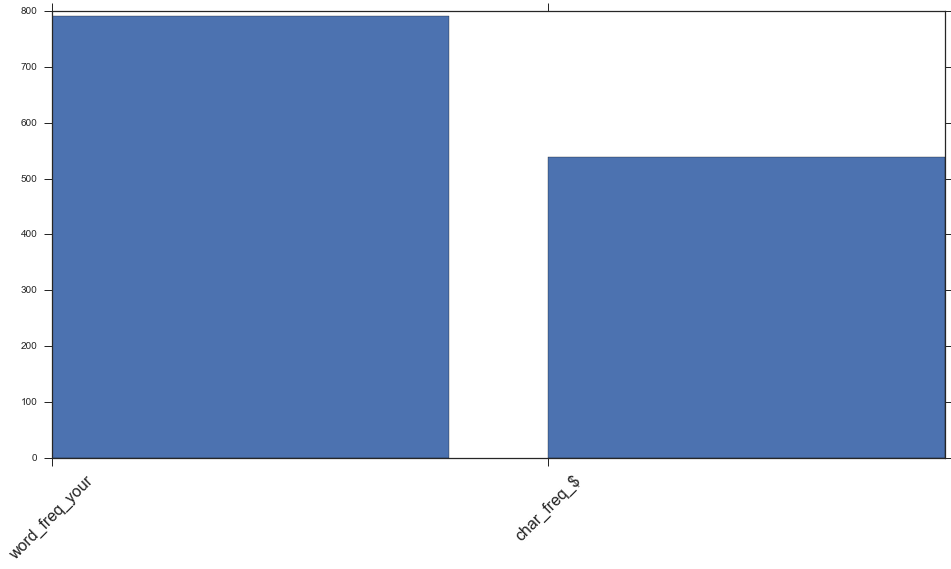

In [433]:
n = np.arange(len(spam_data[features].columns))

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

ax.bar(n, feature_selection.f_classif(spam_data[features].values, spam_data.is_spam)[0])
ax.set_xticks(n) 
xtickNames = ax.set_xticklabels(spam_data[features].columns)

_ = plt.setp(xtickNames, rotation=45, fontsize=16)

In [417]:
h = .02  # step size in the mesh
# Create color maps
cmap_light  =   ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold   =   ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, y_min = spam_data.min()[features]
x_max, y_max = spam_data.max()[features]

# x_min, x_max = spam_data.values[:, spam_data.columns.get_loc('word_freq_your')].min() - .5, X_train[:, spam_data.columns.get_loc('word_freq_your')].max() + .5
# y_min, y_max = spam_data.values[:, spam_data.columns.get_loc('char_freq_$')].min() - .5, X_train[:, spam_data.columns.get_loc('char_freq_$')].max() + .5

# spam_data.columns.get_loc('word_freq_your')

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# len(np.c_[xx.ravel(), yy.ravel()])



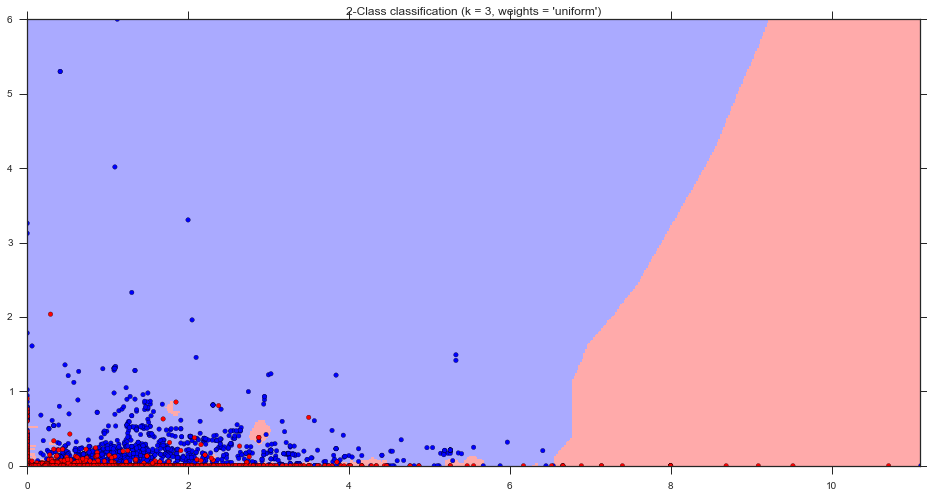

In [418]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Plot also the training points
plt.figure(figsize=(16,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(spam_data['word_freq_your'], spam_data['char_freq_$'], c=spam_data.is_spam, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = {}, weights = '{}')".format(clf.n_neighbors, clf.weights))


### Exercise 7: Plot the ROC Curve for the logistic regression you chose

In [577]:
# nice!
def plot_roc_curve(target_test, target_predicted_proba, categories):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    
    for pos_label, category in enumerate(categories):
        fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, pos_label], pos_label)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='{} ROC curve (area = {:.3f})'.format(category, roc_auc))
    
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

(4601,) (4601, 2)
Residual sum of squares: 0.21
Variance score: 0.79


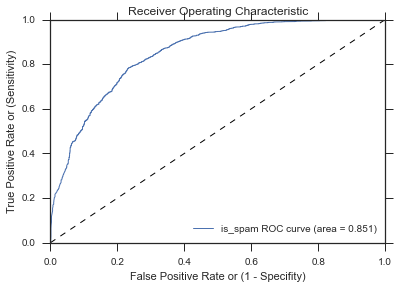

In [592]:
X = spam_data[['char_freq_$', 'capital_run_length_total', 'word_freq_000', 'word_freq_you']]
Y = spam_data['is_spam']

logreg = linear_model.LogisticRegression(C=1.0)
result = logreg.fit(X, Y)

target_predicted_proba = logreg.predict_proba(X)
plot_roc_curve(spam_data.is_spam, target_predicted_proba, ['is_spam'])
print spam_data.is_spam.shape, target_predicted_proba.shape

# The mean square error
print ("Residual sum of squares: %.2f" %
        np.mean((logreg.predict(X) - Y) ** 2))

# Explained variance score: 1 is perfect prediction
print ('Variance score: %.2f' % logreg.score(X, Y))


In [6]:
from sklearn import linear_model

X = spam_data[['char_freq_$','capital_run_length_total', 'word_freq_000']]
Y = spam_data['is_spam']


cls = linear_model.LogisticRegression(C=1.0)
# X = linear_model.transform(X, threshold=.7)
# cls.transform(X)
result = cls.fit(X, Y)

target_predicted_proba = cls.predict_proba(X)
target_predicted_proba = pd.DataFrame(target_predicted_proba, columns=["spam", "not_spam"])

# plot_roc_curve(spam_data.is_spam, target_predicted_proba, ['is_spam'])

# The mean square error
# print ("Residual sum of squares: %.2f" %
#         np.mean((cls.predict(X) - Y) ** 2))

# # Explained variance score: 1 is perfect prediction
# print ('Variance score: %.2f' % cls.score(X, Y))

# print spam_data.is_spam.shape, target_predicted_proba.shape


### Exercise 8: Demonstrate how the accurary of your predictions changes when you set your threshold to levels other than 50%

In [26]:
# strange idea?

target_predicted_proba['predicted_spam'] = target_predicted_proba['spam']
target_predicted_proba['predicted_spam'] = target_predicted_proba['predicted_spam'].apply(lambda prob: 1 if prob > .12 else 0 )

target_predicted_proba.mean()



spam              0.605903
not_spam          0.394097
predicted_spam    0.881547
dtype: float64

###Exercise 9: Discuss the pro's/con's of moving the threshold away from 50%, why is/isn't this a good idea? 

#your discussion here
I'm not sure why you would want to.  Wouldn't you always want to choose the most probable class?  Otherwise, accuracy suffers?  This goes against the models intended purpose?  I suppose in the case of mutiple class prediction, you could weight different classes / post prediction?  I'm really unsure why you might want to do this.  Look forward to an explanation.

###Bonus: Apply PCA to the features and visualize the data in two dimensions: 

In [29]:
from statsmodels.sandbox.tools.tools_pca import pca

prcomp = pca(spam_data.T)

print "Standard deviations:\n{}".format(np.sqrt(prcomp[2]))
print "\nRotation:\n{}".format(prcomp[3])

Standard deviations:
[  6.02052067e+03 +0.00000000e+00j   1.51638816e+03 +0.00000000e+00j
   2.44620467e+02 +0.00000000e+00j ...,   1.86911308e-05 -4.21483667e-05j
   0.00000000e+00 +4.22024827e-05j   0.00000000e+00 +7.22253944e-05j]

Rotation:
[[ -6.17190611e-03 +0.00000000e+00j   1.21269799e-03 +0.00000000e+00j
    3.82265209e-04 +0.00000000e+00j ...,  -2.80964618e-03 +1.05512485e-03j
   -3.12570420e-03 +0.00000000e+00j  -1.85254047e-03 +0.00000000e+00j]
 [ -2.24289976e-02 +0.00000000e+00j  -6.16925226e-03 +0.00000000e+00j
   -3.31241068e-05 +0.00000000e+00j ...,  -3.56925856e-03 -8.19693677e-03j
   -4.94365600e-03 +0.00000000e+00j  -3.20135328e-02 +0.00000000e+00j]
 [ -5.01467343e-02 +0.00000000e+00j   8.88888780e-03 +0.00000000e+00j
    1.31844993e-02 +0.00000000e+00j ...,   1.29529302e-02 -2.09752985e-02j
    3.83691827e-02 +0.00000000e+00j   8.52425353e-03 +0.00000000e+00j]
 ..., 
 [ -2.55361620e-03 +0.00000000e+00j  -1.18818439e-03 +0.00000000e+00j
   -6.56140010e-04 +0.00000000

In [68]:
def pca_rotations(prcomp, columns=[]): 
    if len(columns) <> len(prcomp.components_):
        columns = range(1, len(prcomp.components_) + 1)
    return pd.DataFrame(prcomp.components_, 
                        index=(map("PC{}".format, range(1, len(prcomp.components_) + 1))), 
                        columns=columns).T
def pca_summary(prcomp):
    return pd.DataFrame([np.sqrt(prcomp.explained_variance_), 
              prcomp.explained_variance_ratio_, 
              prcomp.explained_variance_ratio_.cumsum()],
             index = ["Standard deviation", "Proportion of Variance", "Cumulative Proportion"], 
             columns = (map("PC{}".format, range(1, len(prcomp.components_)+1))))

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipeline = Pipeline((
    ('scaler', StandardScaler()),
    ('prcomp', PCA()),
))
pipeline.fit(spam_data.copy())
spam_data_pca = pipeline.steps[1][1]

print "Standard deviations:\n\t " + ' '.join(map("{:.6}".format, np.sqrt(spam_data_pca.explained_variance_)))
pca_rotations(spam_data_pca, spam_data.columns)

Standard deviations:
	 2.58816 1.92246 1.41861 1.27106 1.248 1.21169 1.18995 1.17279 1.14552 1.13252 1.10578 1.06421 1.05884 1.04671 1.04345 1.03126 1.02406 1.01222 1.00818 1.00173 0.998542 0.989183 0.983438 0.970846 0.968258 0.962512 0.957175 0.951818 0.935188 0.930639 0.914628 0.910693 0.893672 0.884143 0.882126 0.86927 0.860601 0.850612 0.83945 0.833603 0.82183 0.816448 0.791004 0.780033 0.763424 0.762631 0.727346 0.699827 0.671211 0.640722 0.613386 0.605699 0.580219 0.577687 0.551206 0.510314 0.436191 0.0620873


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58
word_freq_make,-0.048514,0.140491,-0.044063,0.108922,-0.054498,0.002629,-0.029137,0.209203,-0.329442,0.003738,-0.053885,0.253900,0.082104,-0.012627,-0.072506,-0.178438,0.103335,0.069303,0.084713,0.163564,-0.022461,-0.004028,-0.105450,-0.066886,-0.128518,0.405046,0.041921,0.052687,0.079577,0.104327,-0.124007,-0.048353,-0.187464,0.037592,0.180226,0.329221,0.042802,-0.293756,-0.096223,-0.063972,0.110814,0.136687,0.075614,-0.275648,-0.019813,-0.030918,0.037104,0.095000,-0.034678,0.034728,-0.003704,-0.006925,-0.036096,0.057831,-0.009288,0.010921,-0.019626,0.002955
word_freq_address,-0.009774,-0.018839,-0.009730,-0.048744,0.054851,0.054859,-0.043198,-0.103964,0.024358,-0.005513,-0.087282,0.082255,0.355941,-0.203556,0.173866,0.432171,0.086891,0.114496,0.047275,-0.133733,-0.471764,0.321610,0.016742,0.046017,-0.202892,0.209996,-0.042429,0.028918,0.075977,-0.013795,0.018109,0.030898,-0.066948,-0.030144,0.002245,-0.096921,0.132378,0.156709,0.066834,-0.020389,-0.060497,-0.071406,-0.096499,-0.143715,-0.047927,-0.030119,-0.022060,-0.019503,-0.054660,0.032096,0.010633,-0.031507,-0.025667,0.034021,-0.003939,-0.044489,-0.021109,-0.001059
word_freq_all,-0.053562,0.145701,-0.007425,0.048202,-0.101242,0.099889,0.071294,0.129871,0.094277,0.124906,-0.287134,-0.119791,-0.080591,0.147817,0.137250,-0.171510,-0.128413,-0.107487,0.096640,-0.067455,-0.152922,-0.055273,0.066459,0.081659,-0.235753,-0.254035,0.011029,0.265948,0.190874,0.064633,-0.124325,0.156866,0.232817,0.147597,0.065669,0.179949,0.443959,0.076789,0.097256,-0.074164,0.148448,-0.106771,-0.012500,-0.017933,-0.019234,-0.107019,-0.013667,0.016479,-0.016746,-0.003606,-0.059556,-0.000094,0.029177,-0.012661,0.010427,0.023101,-0.006307,-0.000605
word_freq_3d,-0.007687,0.015495,0.009462,-0.046194,0.040562,-0.012639,0.004141,-0.010484,0.011587,0.013823,0.035398,0.250369,-0.036298,-0.087644,0.016290,-0.021708,-0.073945,0.295845,-0.761582,-0.073293,0.054059,-0.246780,-0.047808,0.017993,-0.217832,-0.008718,0.018715,0.248948,0.037627,-0.101399,0.072743,-0.140281,0.007610,-0.029725,0.066102,-0.001191,0.085740,0.103430,-0.010763,0.023328,-0.005773,0.009689,-0.058618,-0.014806,0.027956,-0.015293,0.010486,-0.001654,-0.000691,0.002718,0.002993,-0.002675,0.021512,-0.022343,0.004018,-0.016386,-0.004653,-0.000135
word_freq_our,-0.043895,0.121526,-0.132425,-0.074594,-0.253579,-0.126314,0.123353,0.010119,0.311514,0.009768,0.011754,0.049857,-0.097389,-0.003237,-0.090743,0.131845,-0.113149,0.171842,0.141808,-0.048640,0.050851,-0.182288,-0.087858,0.095776,-0.037126,0.042696,-0.129824,-0.022406,-0.104347,0.111398,-0.100886,0.147210,-0.378698,-0.342202,-0.017345,0.159131,-0.131239,0.219466,0.179056,-0.179352,0.273523,0.006185,-0.111642,-0.028501,0.016603,-0.113134,-0.006072,-0.015170,-0.006913,-0.016004,0.014486,0.039785,0.115565,-0.056034,0.017618,-0.008510,-0.018307,-0.000587
word_freq_over,-0.053221,0.153272,0.015989,0.061069,0.067960,0.151512,0.160974,-0.070160,0.074221,-0.075571,0.087754,-0.127876,-0.045622,0.181893,-0.083127,-0.170595,-0.070106,-0.051995,-0.051012,0.073406,-0.073563,0.242643,-0.212932,0.249022,-0.099245,0.060812,-0.321921,-0.072112,-0.189881,0.148606,0.141787,-0.386728,-0.226306,0.294895,0.155280,-0.043812,0.031708,0.203727,-0.061803,0.145418,0.060973,-0.129420,0.070387,0.008347,0.008446,-0.057582,0.006543,0.046015,0.018409,0.000075,-0.007028,-0.009952,0.042196,-0.042242,0.003679,-0.015636,-0.019108,-0.000431
word_freq_remove,-0.055797,0.150504,-0.129944,-0.022050,0.045833,-0.199369,-0.020789,-0.126536,0.291838,0.059413,-0.069233,0.130278,-0.048479,-0.119596,-0.180221,0.176728,-0.101736,-0.161168,-0.048489,-0.081151,0.085557,-0.059144,-0.025876,0.127645,0.123148,0.203404,0.157502,-0.137361,-0.268223,-0.006799,-0.056940

<Container object of 58 artists>

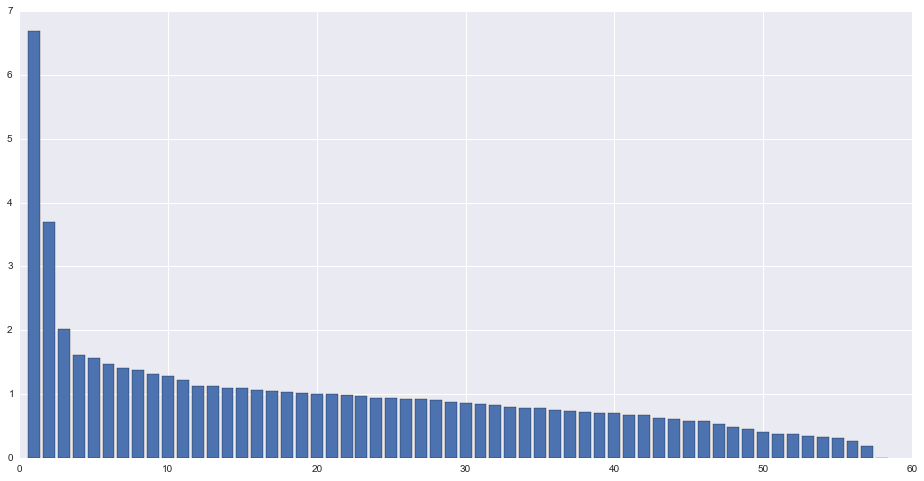

In [32]:
plt.figure(figsize=(16, 8))
plt.bar(range(1, len(spam_data.columns)+1), spam_data_pca.explained_variance_, align='center')

In [632]:
pca_summary(spam_data_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58
Standard deviation,2.588162,1.922464,1.418612,1.271056,1.247999,1.211691,1.189955,1.172790,1.145522,1.132524,1.105775,1.064209,1.058837,1.046708,1.043449,1.031263,1.024061,1.012218,1.008185,1.001733,0.998542,0.989183,0.983438,0.970846,0.968258,0.962512,0.957175,0.951818,0.935188,0.930639,0.914628,0.910693,0.893672,0.884143,0.882126,0.869270,0.860601,0.850612,0.83945,0.833603,0.821830,0.816448,0.791004,0.780033,0.763424,0.762631,0.727346,0.699827,0.671211,0.640722,0.613386,0.605699,0.580219,0.577687,0.551206,0.510314,0.436191,0.062087
Proportion of Variance,0.115493,0.063722,0.034698,0.027855,0.026853,0.025314,0.024414,0.023714,0.022625,0.022114,0.021082,0.019527,0.019330,0.018890,0.018772,0.018336,0.018081,0.017665,0.017525,0.017301,0.017191,0.016870,0.016675,0.016251,0.016164,0.015973,0.015796,0.015620,0.015079,0.014933,0.014423,0.014299,0.013770,0.013478,0.013416,0.013028,0.012770,0.012475,0.01215,0.011981,0.011645,0.011493,0.010788,0.010491,0.010049,0.010028,0.009121,0.008444,0.007768,0.007078,0.006487,0.006325,0.005804,0.005754,0.005238,0.004490,0.003280,0.000066
Cumulative Proportion,0.115493,0.179215,0.213912,0.241767,0.268621,0.293934,0.318348,0.342062,0.364687,0.386801,0.407883,0.427409,0.446739,0.465629,0.484401,0.502737,0.520818,0.538483,0.556008,0.573309,0.590501,0.607371,0.624046,0.640297,0.656461,0.672434,0.688230,0.703850,0.718929,0.733861,0.748285,0.762584,0.776354,0.789832,0.803248,0.816276,0.829046,0.841520,0.85367,0.865651,0.877296,0.888789,0.899576,0.910067,0.920115,0.930143,0.939264,0.947709,0.955476,0.962554,0.969041,0.975366,0.981171,0.986925,0.992163,0.996653,0.999934,1.000000


In [34]:
pca = PCA(n_components=2, whiten=True)
pca.fit(spam_data)
X_pca = pca.transform(spam_data) # Transform the Data into Princial Component vectors


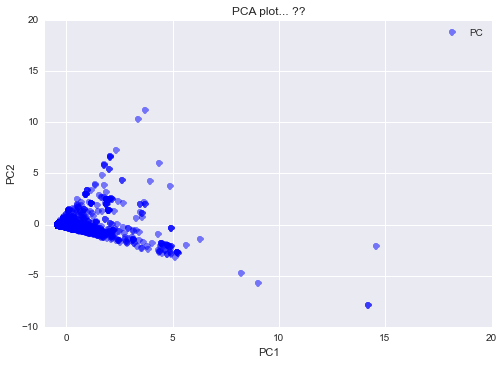

In [153]:
X_pca_df = pd.DataFrame(X_pca)

plt.plot(X_pca_df[0].values, X_pca_df[1].values,
     'o', markersize=7, color='blue', alpha=0.5, label='PC1+2')
# plt.plot(X_pca_df.values[20:40,0], X_pca_df.values[20:40,1],
#      '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim([-1, 20])
plt.ylim([-10, 20])
plt.legend()
plt.title('PCA plot... ??')

plt.show()

In [66]:
np.corrcoef(X_pca.T)

array([[  1.00000000e+00,   7.27472370e-16],
       [  7.27472370e-16,   1.00000000e+00]])

In [69]:
# plot_PCA_2D(X_pca, spam_data.is_spam, ['is_spam']) // 